/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


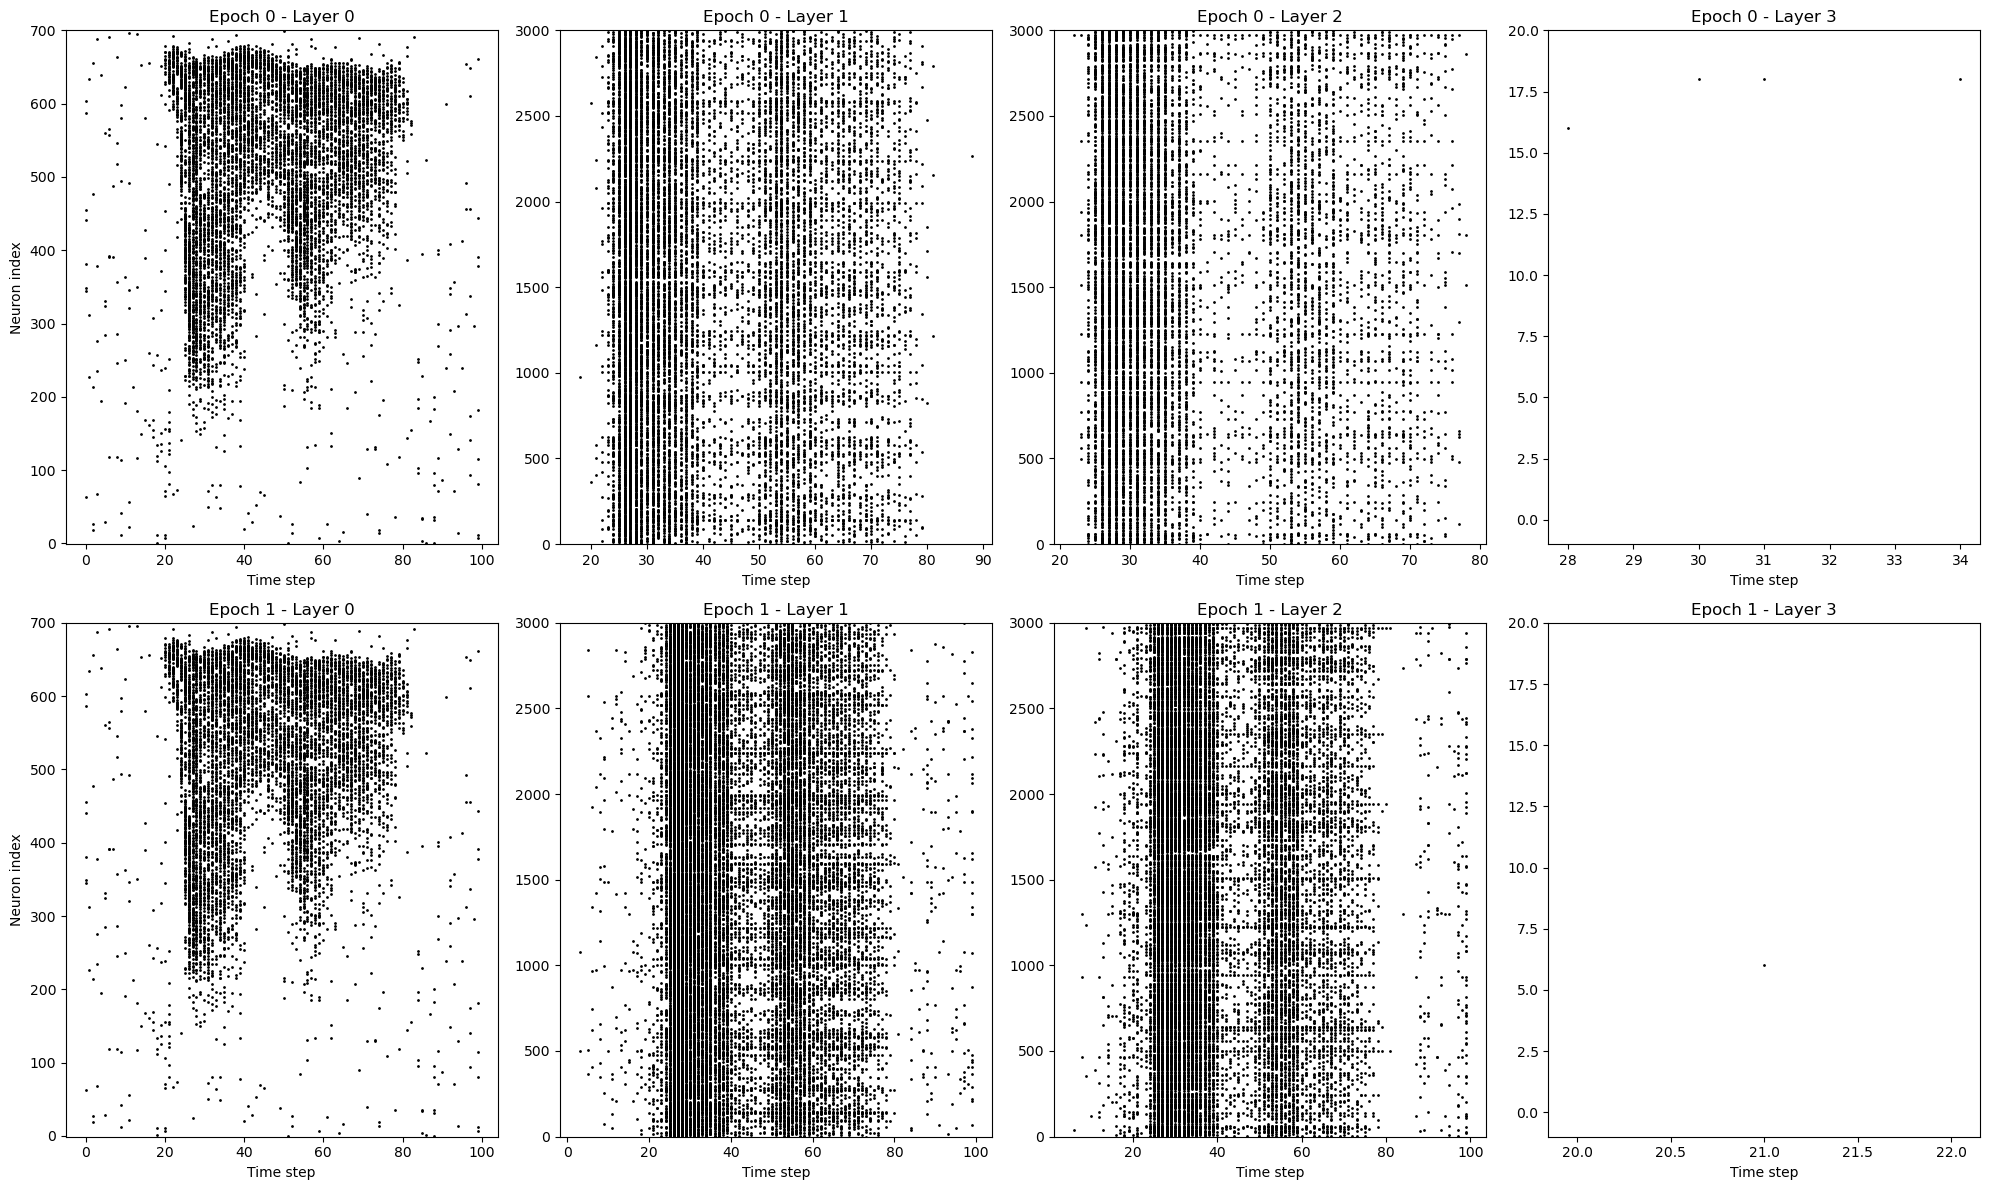

In [1]:
from util.plot_layer_development import plot_layer_development
from glob import glob
import copy
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
import torch

NUMBER_HIDDEN_NEURONS = 3000
NUMBER_HIDDEN_LAYER = 2
beta = 0.8
threshold = 1

base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

all_point_of_chaos_models = glob('./models/experiment_point_of_chaos/*.pth')

results = []

for model_path in all_point_of_chaos_models:
    epoch = result = model_path.split('epoch_')[-1].replace(".pth", "")

    model = copy.deepcopy(base_net)
    model.load_state_dict(torch.load(model_path))
    results.append([epoch, model])

results = sorted(results, key=lambda key: key[0])

epochs = [value[0] for value in results]
models = [value[1] for value in results]

plot_layer_development(models, [f'Epoch {epoch}' for epoch in epochs])

# Point of chaos without overfitting?
- training different network combinations for only 5 epochs => comparing them what parameter configurations make it denser => does this denseness improve the test accuracy
- can we turn these parameter combinations so to make it even more dense => lower beta value?

In [ ]:
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from training.train_snn import train_snn

NUMBER_HIDDEN_NEURONS = 100
NUMBER_HIDDEN_LAYER = 1

BETAS = [0.6, 0.7, 0.8, 0.9, 0.99]

threshold = 1

for beta in BETAS:
    base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                        number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                        number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                        beta=beta,
                                                        threshold=threshold,
                                                        time_steps=TIME_STEPS,
                                                        number_hidden_layers=NUMBER_HIDDEN_LAYER)
    sparsity = 0

    train_snn(base_net, 
                num_epochs=3, 
                sparsity=sparsity,
                save_model=f'./model/experiment_point_of_chaos/3_epochs_beta_{beta}_threshold_1',
                additional_output_information={'sparsity': sparsity, 'number_hidden_neurons': NUMBER_HIDDEN_NEURONS, 'number_hidden_layer': NUMBER_HIDDEN_LAYER, 'beta': beta, 'threshold': threshold}, 
                output_file_path=f'./output/experiments_point_of_chaos/3_epochs_beta_{beta}_threshold_1.json')

Epoch: 0
loss 290.1638177906315
train accuracy 0.1392839627268269
test accuracy 20.80388692579505
Epoch: 1
